In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [9]:
df = pd.read_csv('./3D_spatial_network.txt', names = ['a','latitude','longitude','altitude'])
df.head()

,a,latitude,longitude,altitude
0,144552912,9.349849,56.740876,17.052772
1,144552912,9.350188,56.740679,17.614840
2,144552912,9.350549,56.740544,18.083536
3,144552912,9.350806,56.740484,18.279465
4,144552912,9.351053,56.740486,18.422974


In [10]:
df = df.drop('a',axis=1)
df.head()

,latitude,longitude,altitude
0,9.349849,56.740876,17.052772
1,9.350188,56.740679,17.614840
2,9.350549,56.740544,18.083536
3,9.350806,56.740484,18.279465
4,9.351053,56.740486,18.422974


# Data Visualization

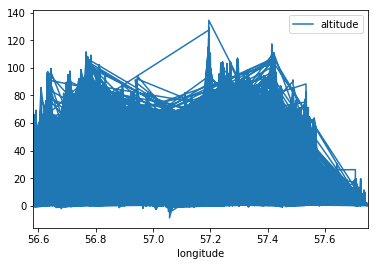

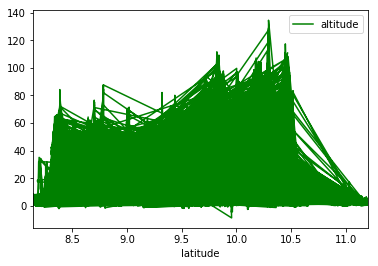

In [20]:
df.plot(x = 'longitude',y='altitude')
df.plot(x = 'latitude',y='altitude', color='green')

# Normalizing the data

In [22]:
df2 = (df-df.mean())/df.std()
df2.head()

,latitude,longitude,altitude
0,-0.608892,-1.184481,-0.275681
1,-0.608350,-1.185162,-0.245492
2,-0.607776,-1.185625,-0.220318
3,-0.607366,-1.185832,-0.209794
4,-0.606972,-1.185826,-0.202086


# Setting up the Matrices

In [27]:
my_data = df2

### The 'X' matrix

In [43]:
X = my_data.iloc[:,0:2]
ones = np.ones([X.shape[0],1])
X = np.concatenate((ones,X),axis=1)
X

array([[ 1.        , -0.60889197, -1.18448067],
       [ 1.        , -0.60835032, -1.18516189],
       [ 1.        , -0.60777632, -1.18562479],
       ...,
       [ 1.        ,  0.32386038,  1.43541823],
       [ 1.        ,  0.33736037,  1.42380047],
       [ 1.        ,  0.33731654,  1.42501299]])

### The 'y' matrix and the initial weights('theta')

In [57]:
y = my_data.iloc[:,2:3].values
theta = np.zeros([1,3]) #initial weights are set to zero

## Setting up the hyperparameter

In [58]:
alpha = 0.01
iters = 1000

# Cost Computation

In [59]:
def computeCost(X,y,theta):
    err = np.power(((X@theta.T)-y),2)
    return (np.sum(err))/(2*len(X))

# Gradient Function

In [ ]:
def gradientDescent(X,y,theta,iters,alpha):
    cost = np.zeros(iters)
    for i in range(iters):
        theta = 